### Imports
- ```networkx``` for for creating a directed graph representation of the linked list.
- ```pyplot``` to display the linked list graph visualization generated by networkx.

```networkx``` creates a digraph structure in memory and uses the ```spring_layout``` algorithm to arrange nodes for visualization. 
Then, ```networkx``` uses ```matplotlib```'s ```pyplot``` to draw the graph elements like nodes and edges onto a ```matplotlib``` ```axes``` object. 
Then, ```pyplot.show()``` renders this object and displays the graph visually.

-```time``` to slow the exectution of the ```detect_cycle``` when ```verbose``` is ```True``` to show the algorithm's progression in real time.

In [1]:
import networkx
import matplotlib.pyplot as plot
import time

### Node class
- Simple class definition for a linked list node, just stores a value and a pointer to the next node. 

In [2]:
class Node:
    def __init__(self, val):
        self.value = val
        self.next = None

### LinkedList
- Simple class definition for a linked list data structure using ```Node``` as nodes on the list.
- Stores a ```head``` and tracks the linked list's ```size```.

**LinkedList ```generate``` function:**
- This allows you to give a size parameter to specify how large of a ```LinkedList``` to generate.
- Values of Nodes in the linked list being at 1 and count up from there for each subsequent ```Node```.
- ```cycle_start_index```, if between 0 and the length of the linked list, will point the last node of the linked list toward the specified index. 
    - Causing the tail to loop in onto a previous node in the list and thus creating a cycle.
 
**LinkedList ```visualize``` function:**
- This handles the logic of creating a graphical representation of the linked list.
- Best for smaller graphs, get's too crowded after ~20+ nodes.

In [3]:
class LinkedList:
    def __init__(self):
        self.head = None
        self.size = 0
        
    def generate(self, size, cycle_start_index=None):
        if size <= 0:
            self.head = None
            return

        self.head = Node(0)
        self.size += 1
        current = self.head
        nodes = [self.head]
        
        for i in range(1, size):
            new_node = Node(i)
            current.next = new_node
            current = new_node
            nodes.append(new_node)
            self.size += 1

        if cycle_start_index is not None and 0 <= cycle_start_index < size:
            current.next = nodes[cycle_start_index]

    def print(self):
        current = self.head
        count = 0
        while current and count < self.size + 10:
            print(current.value, end=" -> ")
            current = current.next
            count += 1
        if count >= self.size+10 and current:
            print("Timed out, not completed.")
        else:
            print("Completed")

    def visualize(self):
        graph = networkx.DiGraph()
        current_node = self.head
        nodes = []
        count = 0
        visualization_limit = self.size 
        while current_node and count < visualization_limit+10:
            graph.add_node(current_node.value)
            nodes.append(current_node)
            current_node = current_node.next
            count += 1

        for i in range(len(nodes) - 1):
            if nodes[i+1]:
                graph.add_edge(nodes[i].value, nodes[i+1].value)

        pos = networkx.spring_layout(graph)
        networkx.draw(graph, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
        plot.title("Visualization") 
        plot.show()


### ```plot_results``` function
- Takes in a list of x_values and y_values and plots the results.
- By default the titles and labels expect Execution Time (x-asis) vs Linked List Size.
    - Otherwise, these can be passed with the parameters ```title```, ```xlabel``` and ```ylabel```.

In [4]:
def plot_results(x_values, y_values, title="Execution Time of Cycle Detection vs. Linked List Size", xlabel = "Linked List Size (Node count) ", ylabel = "Execution Time (seconds)"):
    plot.clf()      # clear the current figure
    plot.cla()      # clear the current axes

    plot.scatter(x_values, y_values, marker='o')
    plot.xlabel(xlabel)
    plot.ylabel(ylabel)
    plot.title(title)
    plot.grid(True)
    plot.show()

### ```dectect_cycle``` functions
- Runs floyd's tortise and the hare algorithm on the provided ```linked_list```.
- The parameter with ```verbose``` set to ```True``` causes the function to print out the pointer movement and slows its execution for demonstrative purposes.
- Includes ```brents_detect_cycle``` which has one pointer stationary and teleports it to the other pointer at every power of two.

In [5]:
def detect_cycle(linked_list, verbose=False):
    slow = False
    iterations = 0
    if(linked_list.head == None):
        return("No cycle in empty LinkedList")

    tortoise = linked_list.head # tortise
    hare = linked_list.head # hare

    while hare is not None and hare.next is not None:
        if verbose:
            print("Iteration ", iterations)
            iterations += 1
            print("Tortise is at", tortoise.value)
            print("    Hare is at", hare.value)
            time.sleep(0.1)
            
            if linked_list.size-3 <= hare.value <= linked_list.size-1:
                slow = True
            
            if slow:
                time.sleep(0.7)
                
        tortoise = tortoise.next
        hare = hare.next.next
        

                
        if tortoise == hare:
            return ("Cycle detected.")
    return("No cylce detected.")

In [27]:
def brents_detect_cycle(linked_list, verbose=False):
    if not linked_list.head:
        return None  # empty list

    tortoise = linked_list.head  
    hare = linked_list.head.next  

    desired_hops_per_teleport = 1
    remaining_hops = desired_hops_per_teleport 
    iterations = 0

    while hare: 
        if verbose != "tele" and verbose:
            print(f"\nIteration {iterations}")
            print(f"   Tortoise is at {tortoise.value}")
            print(f"    Hare is at {hare.value}")
            print(f"Hops until next tortoise teleport: {remaining_hops}")
            print(f"Hare's goal # of hops/teleport: {desired_hops_per_teleport}")


        # check for cycle
        if tortoise == hare:
            return f"\nCycle. Detected, the length of the cycle is {desired_hops_per_teleport-remaining_hops}."  # cycle detected, return cycle length

        # when length reaches power, reset and move teleport pointer 1 to pointer 2
        if remaining_hops == 0:
            tortoise = hare
            desired_hops_per_teleport *= 2
            remaining_hops = desired_hops_per_teleport
            if verbose == "tele":
                print(f"        Tortoise teleports to the hare's location at {hare.value} and hare's next goal is {desired_hops_per_teleport}.")
            elif verbose:
                print("     The hare doubles it's speed goal.\n")
                print(f"        Tortoise teleports to the hare's location at {hare.value}.")
        
        hare = hare.next
        remaining_hops -= 1
        iterations += 1

    return None  # no cycle


### ```detect_cycle_timed``` function
- Uses the ```time``` library to get start time and end times of the ```detect_cycle``` function.
- Prints the results.
- Returns a the execution time.

In [7]:
def detect_cycle_timed(linked_list, type="floyd", quiet = False):
    start_time = time.time()
    if type == "floyd":
        result = detect_cycle(linked_list)
    elif type == "brent":
        result = brents_detect_cycle(linked_list)
    else:
        result = detect_cycle(linked_list)
    end_time = time.time()
    execution_time = end_time - start_time
    if not quiet:
        print(f"Execution time: {execution_time:.8f} seconds for list of size {linked_list.size}")
    return execution_time

### ```generate_bulk_linked_lists``` function
- Takes in a list of sizes and automatically generates a linked list for each of the sizes in ```list_sizes```.
- Prints progress along the way, since the function can get lengthy to execute with large enough lists.
- Returns a list of the generated linked lists.

In [8]:
def generate_bulk_linked_lists(list_sizes):
    generated_linked_lists = []
    print("Generating linked lists")
    for size in list_sizes:
        print(f"Generating LinkedList of size: {size}")
        new_cycle_list = LinkedList()
        new_cycle_list.generate(size=size, cycle_start_index=5)
        generated_linked_lists.append(new_cycle_list)
    print("Linked lists generation complete")
    return generated_linked_lists

### ```execute_bulk_cycle_detect``` function
- Takes in a list of ```LinkedList``` object instances and performs a call of ```detect_cycle_timed`` on each one.
- Prints results throughout execution.
- Returns a list of exectution times for each of the linked lists corresponding to the order of the provided generated linked lists.

In [9]:
def execute_bulk_cycle_detect(generated_linked_lists):
    times = []
    print("\nBeining timing cycle detection")
    for linked_list in generated_linked_lists:
        print(f"Processing LinkedList of size: {linked_list.size}")
        times.append(detect_cycle_timed(linked_list))
    print("Cycle detection timing complete")
    return times

# Demos

## **Demo 1**
-Demonstrates generating a couple ```LinkedList``` insteance and running the ```print``` and ```visualize``` function on them.
-The first list has no cycle, the second has a cycle with it's last node pointing to node at index 5. 

0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> Completed

Visualizing linked list:


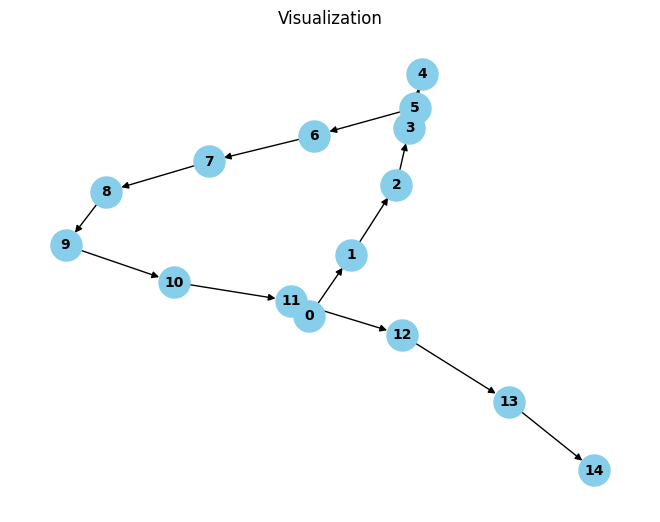

0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> Timed out, not completed.

Visualizing linked list with cycle:


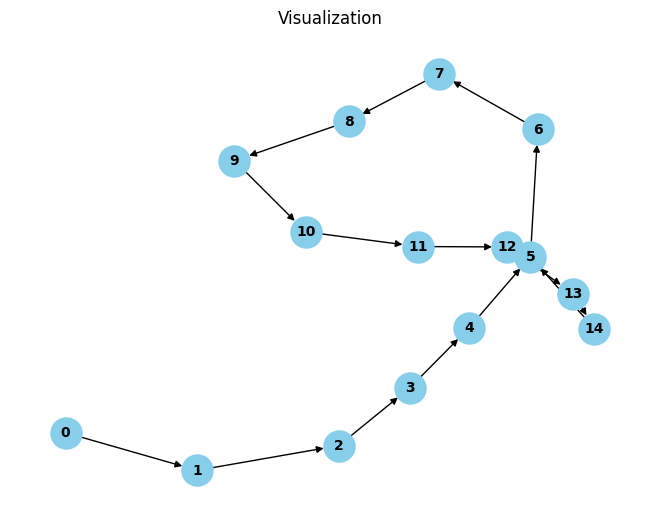

In [10]:
new_list = LinkedList()
new_list.generate(size=15)
new_list.print()
print("\nVisualizing linked list:")
new_list.visualize()

new_cycle_list = LinkedList()
new_cycle_list.generate(size = 15, cycle_start_index = 5)
new_cycle_list.print()
print("\nVisualizing linked list with cycle:")
new_cycle_list.visualize()

## **Demo 2**
- Normal example showing the cycle detection algorithm working in real-time by utilizing the ```verbose``` parameter of detect_cycle. 

In [11]:
new_cycle_list2 = LinkedList()
new_cycle_list2.generate(size = 25, cycle_start_index = 10)
detect_cycle(new_cycle_list2, verbose=True)

Iteration  0
Tortise is at 0
    Hare is at 0
Iteration  1
Tortise is at 1
    Hare is at 2
Iteration  2
Tortise is at 2
    Hare is at 4
Iteration  3
Tortise is at 3
    Hare is at 6
Iteration  4
Tortise is at 4
    Hare is at 8
Iteration  5
Tortise is at 5
    Hare is at 10
Iteration  6
Tortise is at 6
    Hare is at 12
Iteration  7
Tortise is at 7
    Hare is at 14
Iteration  8
Tortise is at 8
    Hare is at 16
Iteration  9
Tortise is at 9
    Hare is at 18
Iteration  10
Tortise is at 10
    Hare is at 20
Iteration  11
Tortise is at 11
    Hare is at 22
Iteration  12
Tortise is at 12
    Hare is at 24
Iteration  13
Tortise is at 13
    Hare is at 11
Iteration  14
Tortise is at 14
    Hare is at 13


'Cycle detected.'

## **Demo 3**
- Worst case example showing the cycle detection algorithm working in real-time on a graph where the cycle loops back toward the first element of the linked list.
- Iteration count demonstrates this is O(n).

In [12]:
new_cycle_list3 = LinkedList()
new_cycle_list3.generate(size = 25, cycle_start_index=0)
detect_cycle(new_cycle_list3, verbose=True)

Iteration  0
Tortise is at 0
    Hare is at 0
Iteration  1
Tortise is at 1
    Hare is at 2
Iteration  2
Tortise is at 2
    Hare is at 4
Iteration  3
Tortise is at 3
    Hare is at 6
Iteration  4
Tortise is at 4
    Hare is at 8
Iteration  5
Tortise is at 5
    Hare is at 10
Iteration  6
Tortise is at 6
    Hare is at 12
Iteration  7
Tortise is at 7
    Hare is at 14
Iteration  8
Tortise is at 8
    Hare is at 16
Iteration  9
Tortise is at 9
    Hare is at 18
Iteration  10
Tortise is at 10
    Hare is at 20
Iteration  11
Tortise is at 11
    Hare is at 22
Iteration  12
Tortise is at 12
    Hare is at 24
Iteration  13
Tortise is at 13
    Hare is at 1
Iteration  14
Tortise is at 14
    Hare is at 3
Iteration  15
Tortise is at 15
    Hare is at 5
Iteration  16
Tortise is at 16
    Hare is at 7
Iteration  17
Tortise is at 17
    Hare is at 9
Iteration  18
Tortise is at 18
    Hare is at 11
Iteration  19
Tortise is at 19
    Hare is at 13
Iteration  20
Tortise is at 20
    Hare is at 15
I

'Cycle detected.'

## **Demo 4**
- Example showing the cycle detection algorithm working in real-time on a graph where the there is **no cycle**.
- Iteration count shows the worst case for this scenario is O(n/2), or O(n)

In [13]:
new_cycle_list4 = LinkedList()
new_cycle_list4.generate(size = 20)
detect_cycle(new_cycle_list4, verbose=True)

Iteration  0
Tortise is at 0
    Hare is at 0
Iteration  1
Tortise is at 1
    Hare is at 2
Iteration  2
Tortise is at 2
    Hare is at 4
Iteration  3
Tortise is at 3
    Hare is at 6
Iteration  4
Tortise is at 4
    Hare is at 8
Iteration  5
Tortise is at 5
    Hare is at 10
Iteration  6
Tortise is at 6
    Hare is at 12
Iteration  7
Tortise is at 7
    Hare is at 14
Iteration  8
Tortise is at 8
    Hare is at 16
Iteration  9
Tortise is at 9
    Hare is at 18


'No cylce detected.'

## **Demo 5**
- Example showing the use of ```generate_bulk_linked_lists```, ```execute_bulk_cycle_detect```, and ```plot_results```.

Generating linked lists
Generating LinkedList of size: 10
Generating LinkedList of size: 100
Generating LinkedList of size: 1000
Generating LinkedList of size: 10000
Generating LinkedList of size: 100000
Generating LinkedList of size: 1000000
Generating LinkedList of size: 4000000
Generating LinkedList of size: 8000000
Generating LinkedList of size: 10000000
Generating LinkedList of size: 20000000
Linked lists generation complete

Beining timing cycle detection
Processing LinkedList of size: 10
Execution time: 0.00000286 seconds for list of size 10
Processing LinkedList of size: 100
Execution time: 0.00000477 seconds for list of size 100
Processing LinkedList of size: 1000
Execution time: 0.00008392 seconds for list of size 1000
Processing LinkedList of size: 10000
Execution time: 0.00044131 seconds for list of size 10000
Processing LinkedList of size: 100000
Execution time: 0.00471139 seconds for list of size 100000
Processing LinkedList of size: 1000000
Execution time: 0.04687333 sec

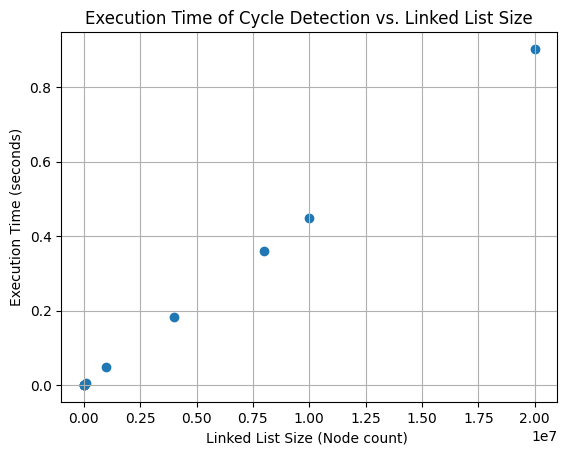

In [14]:
list_sizes = [10,
             100,
             1000,
             10000,
             100000,
             1000000,
             4000000,
             8000000,
             10000000,
             20000000]

generated_linked_lists = generate_bulk_linked_lists(list_sizes)

times = execute_bulk_cycle_detect(generated_linked_lists)

plot_results(x_values = list_sizes, y_values = times)

## **Demo 6**
- Brent's Cycle Detection Algorithm

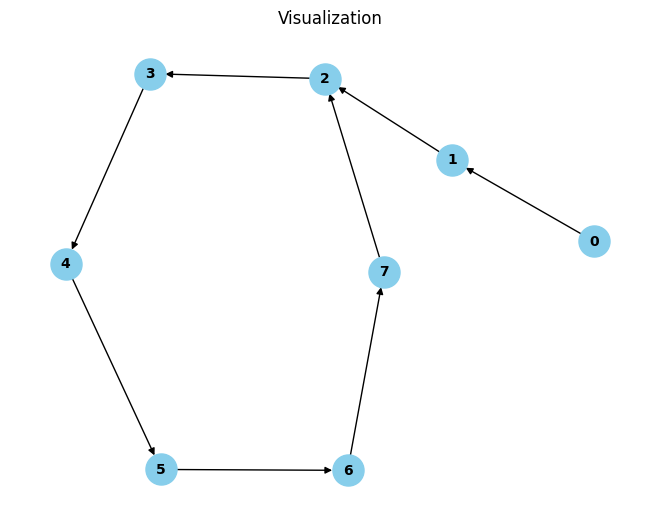


Iteration 0
   Tortoise is at 0
    Hare is at 1
Hops until next tortoise teleport: 1
Hare's goal # of hops/teleport: 1

Iteration 1
   Tortoise is at 0
    Hare is at 2
Hops until next tortoise teleport: 0
Hare's goal # of hops/teleport: 1
    Tortoise teleports to the hare's location at 2 and hare's next goal is 2.

Iteration 2
   Tortoise is at 2
    Hare is at 3
Hops until next tortoise teleport: 1
Hare's goal # of hops/teleport: 2

Iteration 3
   Tortoise is at 2
    Hare is at 4
Hops until next tortoise teleport: 0
Hare's goal # of hops/teleport: 2
    Tortoise teleports to the hare's location at 4 and hare's next goal is 4.

Iteration 4
   Tortoise is at 4
    Hare is at 5
Hops until next tortoise teleport: 3
Hare's goal # of hops/teleport: 4

Iteration 5
   Tortoise is at 4
    Hare is at 6
Hops until next tortoise teleport: 2
Hare's goal # of hops/teleport: 4

Iteration 6
   Tortoise is at 4
    Hare is at 7
Hops until next tortoise teleport: 1
Hare's goal # of hops/teleport:

In [15]:
new_cycle_list6 = LinkedList()
new_cycle_list6.generate(size = 8, cycle_start_index = 2)
new_cycle_list6.visualize()
#print(detect_cycle(new_cycle_list6, verbose = True))
print(brents_detect_cycle(new_cycle_list6, verbose=True))

# Analysis

In [16]:
def bulk_generate_random_cycle_lists(list_count, fixed = False):
    import random

    random_linked_lists = []
    num_lists = list_count

    for _ in range(num_lists):
        
        size = random.randint(2, 100000)
        if fixed:
            cycle_start_index = size - 1
        else:
            cycle_start_index = random.randint(0, size - 1)

        ll = LinkedList()
        ll.generate(size=size, cycle_start_index=cycle_start_index)

        random_linked_lists.append(ll)
    return random_linked_lists

In [17]:
def compare_cycle_detection_algorithms(random_linked_lists, outliers=True):
    import time
    import matplotlib.pyplot as plt
    import numpy as np
    
    list_sizes = []
    floyd_times = []
    brent_times = []
    
    for list in random_linked_lists:
        size = list.size
        list_sizes.append(size)
        
        
        start_time = time.time()
        detect_cycle(list)
        end_time = time.time()
        floyd_times.append(end_time - start_time)
        
        
        start_time = time.time()
        brents_detect_cycle(list)
        end_time = time.time()
        brent_times.append(end_time - start_time)
    
    
    list_sizes = np.array(list_sizes)
    floyd_times = np.array(floyd_times)
    brent_times = np.array(brent_times)
    
    filtered_sizes_floyd = list_sizes
    filtered_floyd_times = floyd_times
    filtered_sizes_brent = list_sizes
    filtered_brent_times = brent_times
    
    if not outliers:
        floyd_mean, floyd_std = np.mean(floyd_times), np.std(floyd_times)
        brent_mean, brent_std = np.mean(brent_times), np.std(brent_times)
        
        floyd_mask = np.abs(floyd_times - floyd_mean) <= 2 * floyd_std
        brent_mask = np.abs(brent_times - brent_mean) <= 2 * brent_std
        
        filtered_sizes_floyd = list_sizes[floyd_mask]
        filtered_floyd_times = floyd_times[floyd_mask]
        
        filtered_sizes_brent = list_sizes[brent_mask]
        filtered_brent_times = brent_times[brent_mask]
    
    # plot floyd's 
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_sizes_floyd, filtered_floyd_times, label="Floyd's Algorithm", alpha=0.7)
    plt.xlabel('Linked List Size')
    plt.ylabel('Execution Time (seconds)')
    title_suffix = " (Outliers Removed)" if outliers else ""
    plt.title(f"Floyd's Cycle Detection Algorithm Performance{title_suffix}")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()
    
    # plot brent's
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_sizes_brent, filtered_brent_times, label="Brent's Algorithm", color='orange', alpha=0.7)
    plt.xlabel('Linked List Size')
    plt.ylabel('Execution Time (seconds)')
    plt.title(f"Brent's Cycle Detection Algorithm Performance{title_suffix}")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()
    
    # plot both
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_sizes_floyd, filtered_floyd_times, label="Floyd's Algorithm", alpha=0.7)
    plt.scatter(filtered_sizes_brent, filtered_brent_times, label="Brent's Algorithm", color='orange', alpha=0.7)
    plt.xlabel('Linked List Size')
    plt.ylabel('Execution Time (seconds)')
    plt.title(f"Comparison of Cycle Detection Algorithms{title_suffix}")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()


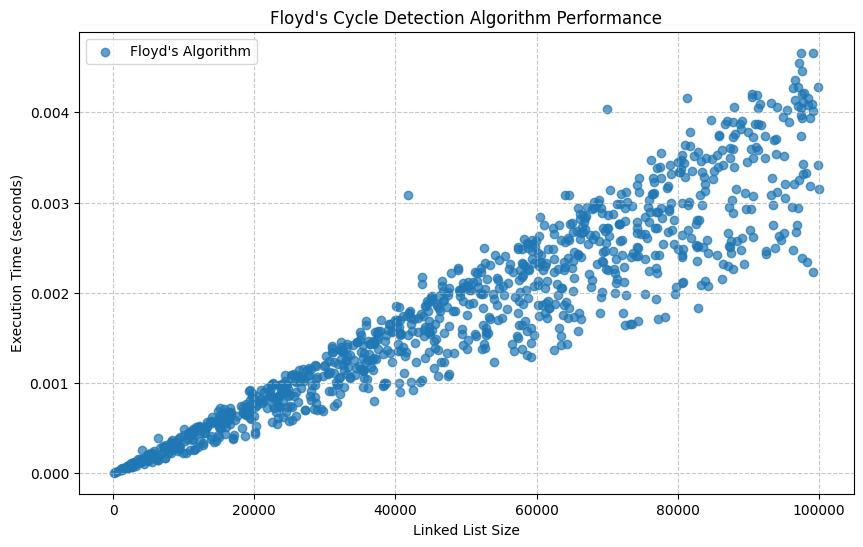

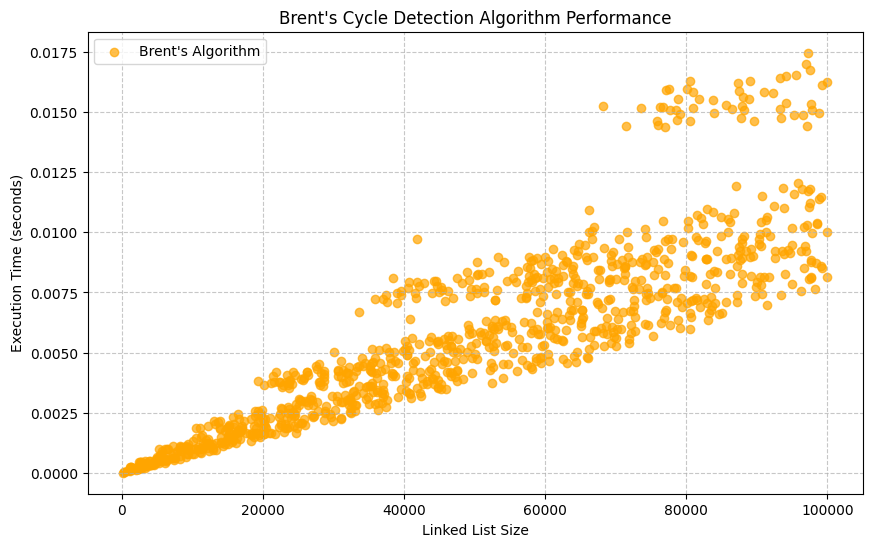

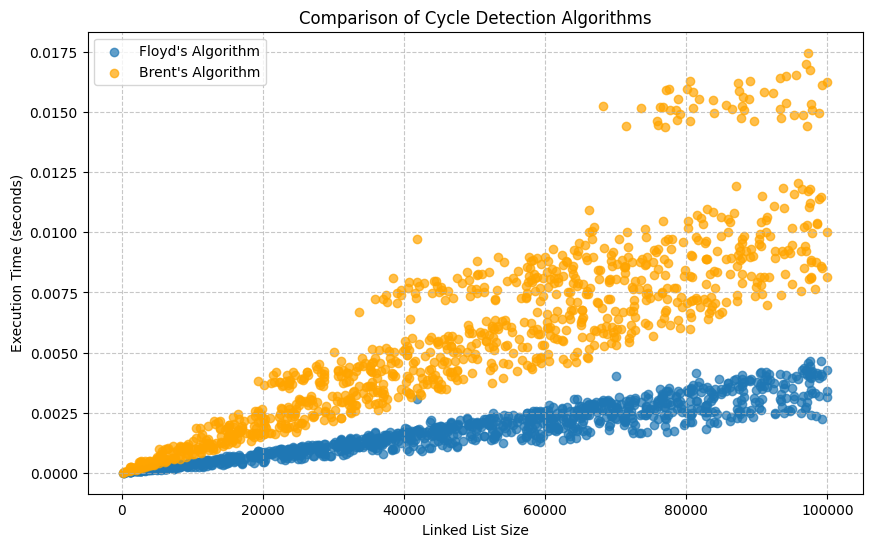

In [18]:
compare_cycle_detection_algorithms(bulk_generate_random_cycle_lists(1000))

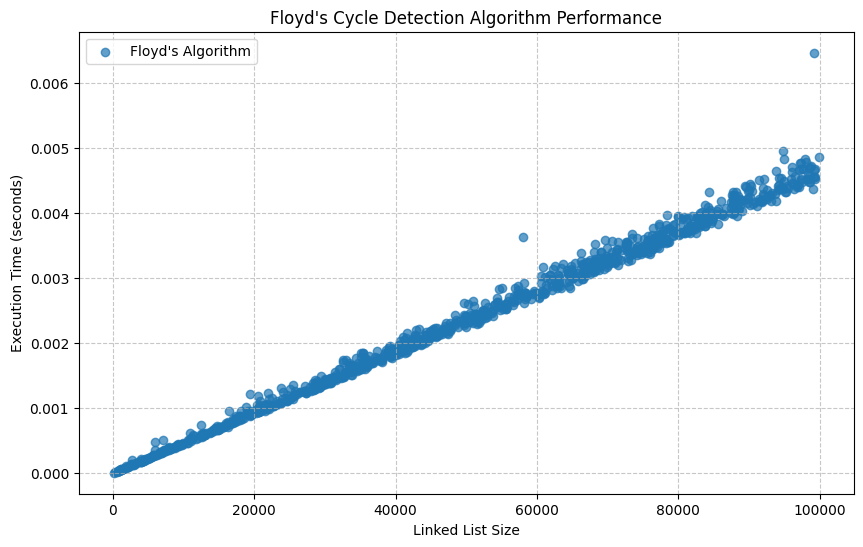

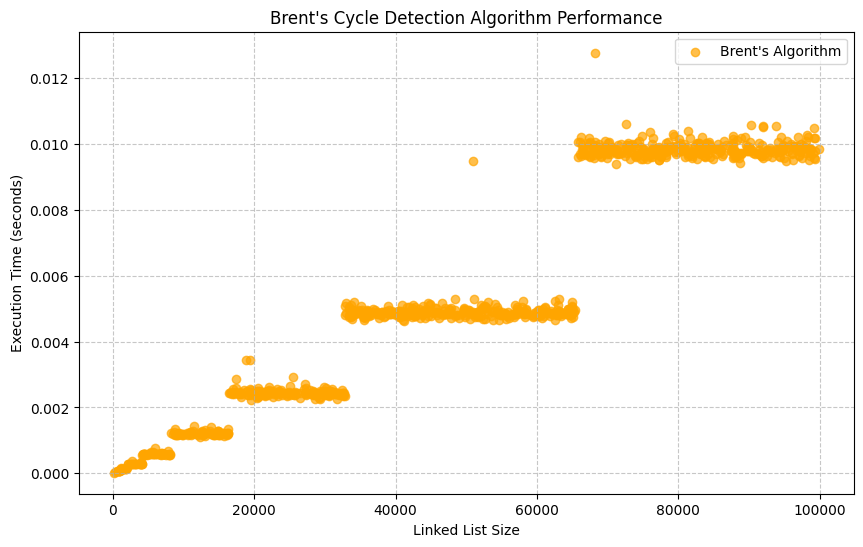

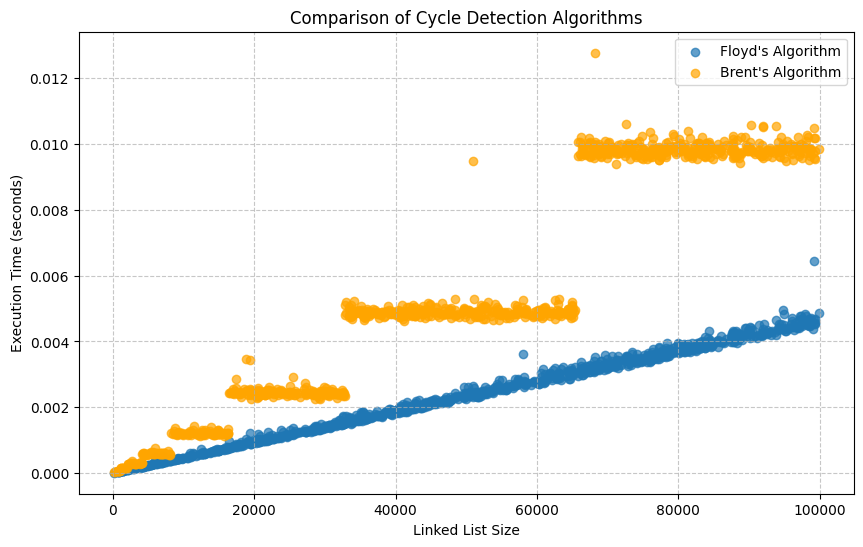

In [19]:
compare_cycle_detection_algorithms(bulk_generate_random_cycle_lists(1000, fixed = True)) #when cycle started at 0

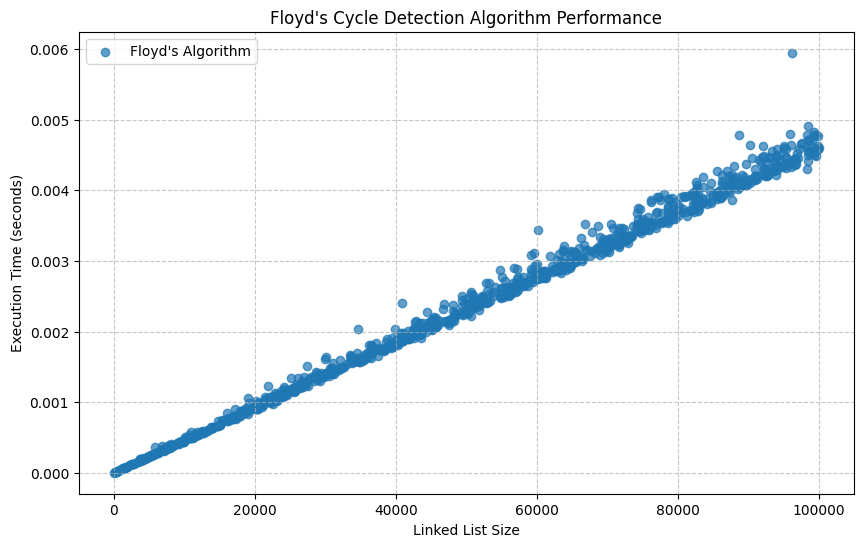

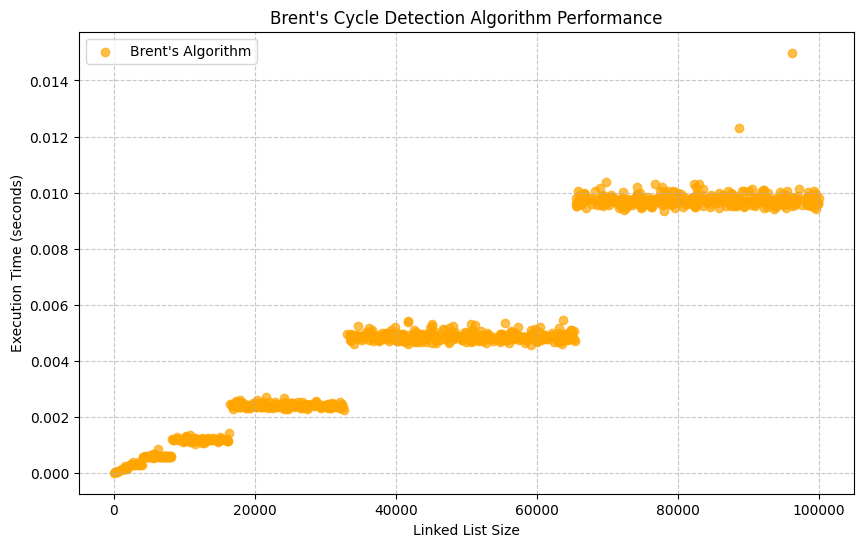

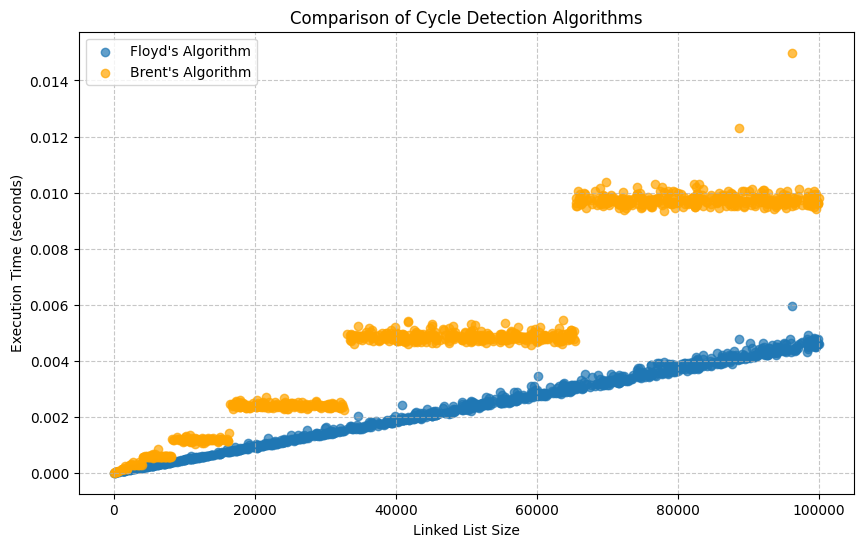

In [20]:
compare_cycle_detection_algorithms(bulk_generate_random_cycle_lists(1000, fixed = True)) #when cycle starts at length - 1

Plotting 927 data points after removing outliers.
Removed 73 outliers.
Brent's algorithm requires 36.05% fewer pointer advancements than Floyd's algorithm on average.


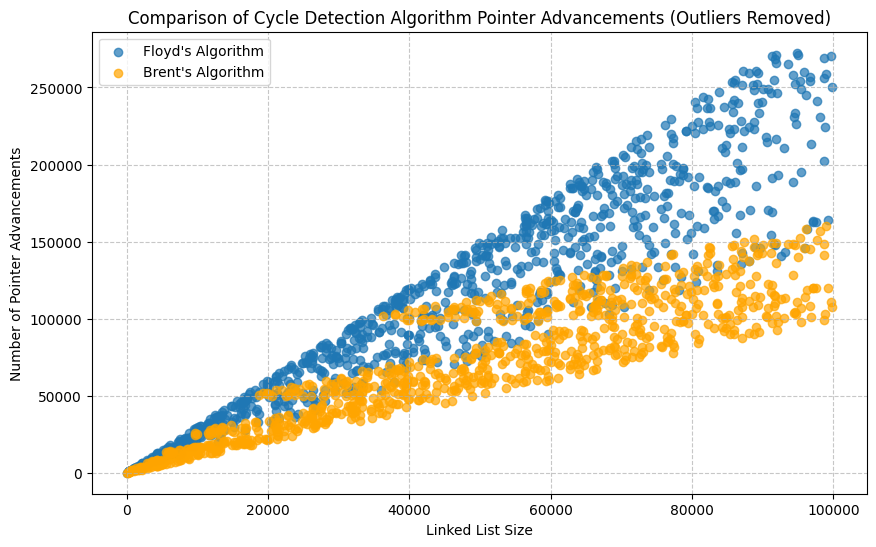

In [21]:
def compare_cycle_detection_advancements(lists_with_cycles):
    list_sizes = []
    floyd_pointer_advances = []
    brent_pointer_advances = []
    # need to track info about both executions cycles so reimplementing both algorithms for this output pointer advancement analysis 
    for linked_list in lists_with_cycles:
        list_sizes.append(linked_list.size)

        # do floyd's and track pointer advances
        slow_pointer = fast_pointer = linked_list.head
        floyd_advance_counter = 0
        cycle_detected = False

        if fast_pointer is None or fast_pointer.next is None:
             floyd_pointer_advances.append(0)
          
        else: 
            while fast_pointer is not None and fast_pointer.next is not None:
        
                if slow_pointer == fast_pointer and floyd_advance_counter > 0:
                    cycle_detected = True
                    break

                slow_pointer = slow_pointer.next
                floyd_advance_counter += 1
                
                if fast_pointer.next is None:
                     break
                
                fast_pointer = fast_pointer.next
                floyd_advance_counter += 1
                
                fast_pointer = fast_pointer.next
                floyd_advance_counter += 1

                if slow_pointer == fast_pointer:
                    cycle_detected = True
                    break
                    
            floyd_pointer_advances.append(floyd_advance_counter)
            
        if not linked_list.head or not linked_list.head.next:
             brent_pointer_advances.append(0)
             continue
        # then do brent's' and also track pointer advances
        tortoise = linked_list.head
        hare = linked_list.head.next  
        brent_advance_counter = 1

        power = 1
        length = 1

        while hare is not None and tortoise != hare:
            if power == length:
                tortoise = hare
                power *= 2
                length = 0
            
            hare = hare.next
            brent_advance_counter += 1
            length += 1

        if cycle_detected:
            brent_pointer_advances.append(brent_advance_counter)
        else:
            brent_pointer_advances.append(None)

    valid_indices = [i for i, (floyd_advances, brent_advances) in enumerate(zip(floyd_pointer_advances, brent_pointer_advances)) 
                     if floyd_advances is not None and brent_advances is not None]

    if not valid_indices:
         print("No valid data points found for plotting.")
         return

    valid_sizes = [list_sizes[i] for i in valid_indices]
    valid_floyd_advances = [floyd_pointer_advances[i] for i in valid_indices]
    valid_brent_advances = [brent_pointer_advances[i] for i in valid_indices]
    
    # filter outliers greater than 2 standard deviations before graphing
    floyd_mean = sum(valid_floyd_advances) / len(valid_floyd_advances)
    floyd_std = (sum((x - floyd_mean) ** 2 for x in valid_floyd_advances) / len(valid_floyd_advances)) ** 0.5  
    brent_mean = sum(valid_brent_advances) / len(valid_brent_advances)
    brent_std = (sum((x - brent_mean) ** 2 for x in valid_brent_advances) / len(valid_brent_advances)) ** 0.5
    filtered_indices = [i for i, (floyd, brent) in enumerate(zip(valid_floyd_advances, valid_brent_advances))
                       if abs(floyd - floyd_mean) <= 2 * floyd_std and abs(brent - brent_mean) <= 2 * brent_std]
    
    filtered_sizes = [valid_sizes[i] for i in filtered_indices]
    filtered_floyd_advances = [valid_floyd_advances[i] for i in filtered_indices]
    filtered_brent_advances = [valid_brent_advances[i] for i in filtered_indices]
    
    print(f"Plotting {len(filtered_sizes)} data points after removing outliers.")
    print(f"Removed {len(valid_sizes) - len(filtered_sizes)} outliers.")
    
    percent_improvements = [(floyd_advances - brent_advances) / floyd_advances * 100 
                          for floyd_advances, brent_advances in zip(filtered_floyd_advances, filtered_brent_advances)]
    avg_improvement = sum(percent_improvements) / len(percent_improvements)
    print(f"Brent's algorithm requires {avg_improvement:.2f}% fewer pointer advancements than Floyd's algorithm on average.")

    plot.figure(figsize=(10, 6))
    plot.scatter(filtered_sizes, filtered_floyd_advances, label="Floyd's Algorithm", alpha=0.7)
    plot.scatter(filtered_sizes, filtered_brent_advances, label="Brent's Algorithm", color='orange', alpha=0.7)
    plot.xlabel('Linked List Size')
    plot.ylabel('Number of Pointer Advancements')
    plot.title("Comparison of Cycle Detection Algorithm Pointer Advancements (Outliers Removed)")
    plot.grid(True, linestyle='--', alpha=0.7)
    plot.legend()
    plot.show()

compare_cycle_detection_advancements(bulk_generate_random_cycle_lists(1000))

In [29]:
print("cycle starting at 524288")
avg = 0
new_cycle_list212 = LinkedList()
new_cycle_list212.generate(size = 1000000, cycle_start_index = 524288)
for _ in range(20):
    avg += detect_cycle_timed(new_cycle_list212, type="brent", quiet = True)
avg /= 20
print(f"average for cycle starting at 524288 is {avg}")

print("cycle starting at 524289")
avg = 0
new_cycle_list213 = LinkedList()
new_cycle_list213.generate(size = 1000000, cycle_start_index = 524289)
for _ in range(20):
    avg += detect_cycle_timed(new_cycle_list213, type="brent", quiet = True)
avg /= 20
print(f"average for cycle starting at 524289 is {avg}")

cycle starting at 524288
average for cycle starting at 524288 is 0.09100655317306519
cycle starting at 524289
average for cycle starting at 524289 is 0.1382027745246887


In [28]:
new_cycle_list2121 = LinkedList()
new_cycle_list2121.generate(size = 1000000, cycle_start_index = 524288)
brents_detect_cycle(new_cycle_list2121, verbose="tele")

        Tortoise teleports to the hare's location at 2 and hare's next goal is 2.
        Tortoise teleports to the hare's location at 4 and hare's next goal is 4.
        Tortoise teleports to the hare's location at 8 and hare's next goal is 8.
        Tortoise teleports to the hare's location at 16 and hare's next goal is 16.
        Tortoise teleports to the hare's location at 32 and hare's next goal is 32.
        Tortoise teleports to the hare's location at 64 and hare's next goal is 64.
        Tortoise teleports to the hare's location at 128 and hare's next goal is 128.
        Tortoise teleports to the hare's location at 256 and hare's next goal is 256.
        Tortoise teleports to the hare's location at 512 and hare's next goal is 512.
        Tortoise teleports to the hare's location at 1024 and hare's next goal is 1024.
        Tortoise teleports to the hare's location at 2048 and hare's next goal is 2048.
        Tortoise teleports to the hare's location at 4096 and hare's

'\nCycle. Detected, the length of the cycle is 475712.'